##### Copyright 2018 The TensorFlow Authors.

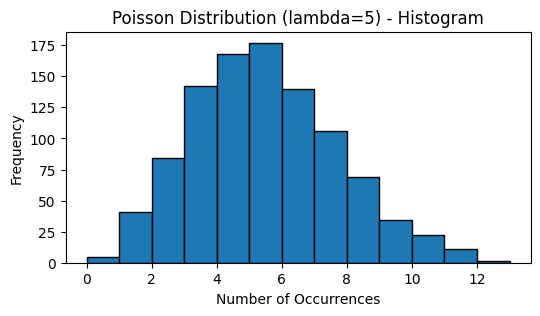

Poisson Distribution Explanation:
The Poisson distribution models the probability of a given number of events occurring in a fixed interval.
Real-world example: It can model the number of customers arriving at a bank per hour, or the number of emails received by a support team per hour.


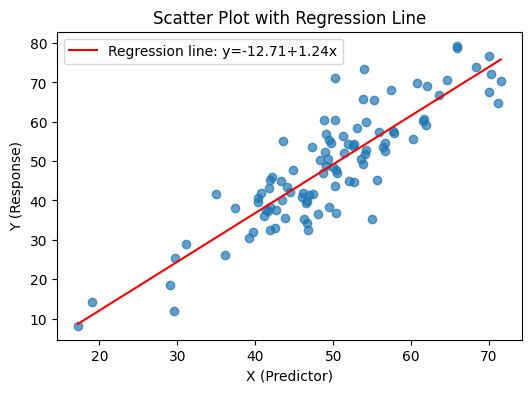

Normal Distribution & Regression Explanation:
The normal distribution is commonly assumed for residuals in regression analysis.
Real-world example: In predicting sales based on advertising spend, the errors around the regression line are often normally distributed, allowing us to compute confidence intervals and test hypotheses.


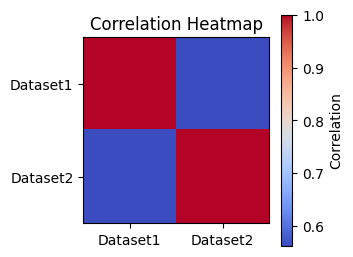


Sampling Methods Explanation:
Simple random sampling: every individual has equal chance, e.g., selecting 100 customers randomly from a store.
Systematic sampling: select every k-th item, e.g., every 10th transaction for quality control.
Simple random sampling avoids periodic bias; systematic sampling is easier to implement for large ordered datasets.


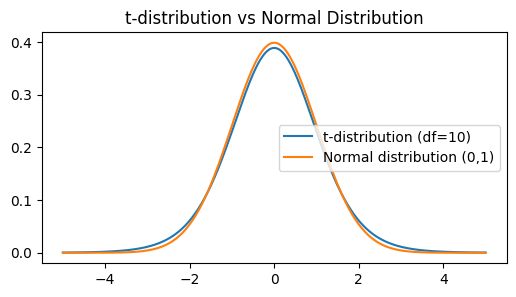


T-distribution Explanation:
T-distribution has heavier tails, useful for small sample sizes when population standard deviation is unknown.
Real-world example: Estimating mean resolution time for support tickets when only 10 sample tickets are observed.
Data bars in Excel visually show the magnitude of values in a range, helpful for quickly spotting high and low values in a dataset.


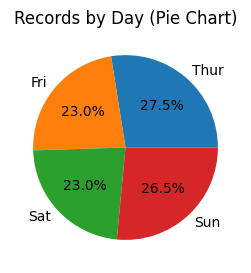

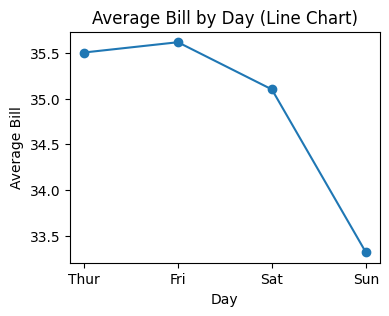

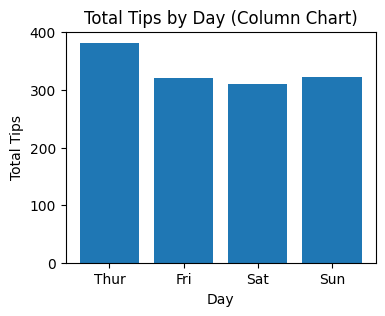


Visualization Explanation:
Pie chart: shows distribution of data across categories, e.g., records by day.
Line chart: tracks trends over time, e.g., average sales per day.
Column chart: compares discrete totals, e.g., total tips collected per day, useful in business reporting.


In [1]:
# Assignment Notebook Revised with Group Members
# Group Members: Simond Campbell 20224408, Carlton Lowe, Chavar Welsh, Makeda Lowe, Shanique Russell

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t, norm

np.random.seed(42)

# ----------------------
# Question 1: Poisson Distribution and Histogram
# ----------------------
# Simulate Poisson distribution
lam = 5  # average number of occurrences (e.g., 5 customer arrivals per hour)
poisson_samples = np.random.poisson(lam=lam, size=1000)

# Plot histogram
plt.figure(figsize=(6,3))
plt.hist(poisson_samples, bins=range(0, max(poisson_samples)+2), edgecolor='black')
plt.title('Poisson Distribution (lambda=5) - Histogram')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency')
plt.show()

# Explanation with real-world example
print("Poisson Distribution Explanation:")
print("The Poisson distribution models the probability of a given number of events occurring in a fixed interval.")
print("Real-world example: It can model the number of customers arriving at a bank per hour, or the number of emails received by a support team per hour.")

# ----------------------
# Question 2: Normal Distribution and Regression Plot
# ----------------------
# Generate normal distribution
mu, sigma, n = 50, 10, 100
x = np.random.normal(loc=mu, scale=sigma, size=n)
# Create a response variable with some noise
slope_true, intercept_true = 1.2, -10
noise = np.random.normal(scale=8, size=n)
y = intercept_true + slope_true * x + noise

# Fit regression line
coeffs = np.polyfit(x, y, 1)
slope, intercept = coeffs[0], coeffs[1]
reg_line_x = np.linspace(x.min(), x.max(), 100)
reg_line_y = intercept + slope * reg_line_x

# Scatter plot with regression line
plt.figure(figsize=(6,4))
plt.scatter(x, y, alpha=0.7)
plt.plot(reg_line_x, reg_line_y, color='red', label=f'Regression line: y={intercept:.2f}+{slope:.2f}x')
plt.title('Scatter Plot with Regression Line')
plt.xlabel('X (Predictor)')
plt.ylabel('Y (Response)')
plt.legend()
plt.show()

# Explanation with real-world example
print("Normal Distribution & Regression Explanation:")
print("The normal distribution is commonly assumed for residuals in regression analysis.")
print("Real-world example: In predicting sales based on advertising spend, the errors around the regression line are often normally distributed, allowing us to compute confidence intervals and test hypotheses.")

# ----------------------
# Question 3: Heatmap and Sampling Techniques
# ----------------------
# Dataset creation
dataset = np.random.normal(size=1000)
# Create a correlated dataset
dataset2 = 0.5*dataset + np.random.normal(scale=0.8, size=1000)

# Correlation heatmap
corr_matrix = np.corrcoef(np.vstack([dataset, dataset2]))
plt.figure(figsize=(3,3))
plt.imshow(corr_matrix, interpolation='nearest', aspect='equal', cmap='coolwarm')
plt.colorbar(label='Correlation')
plt.xticks([0,1], ['Dataset1','Dataset2'])
plt.yticks([0,1], ['Dataset1','Dataset2'])
plt.title('Correlation Heatmap')
plt.show()

# Sampling methods
df = pd.DataFrame({'value': dataset})
sample_size = 100
# Simple random sampling
simple_random_sample = df.sample(n=sample_size, replace=False).reset_index(drop=True)
# Systematic sampling
k = len(df) // sample_size
start = np.random.randint(0, k)
systematic_idx = list(range(start, len(df), k))[:sample_size]
systematic_sample = df.loc[systematic_idx].reset_index(drop=True)

# Explanation with examples
print("\nSampling Methods Explanation:")
print("Simple random sampling: every individual has equal chance, e.g., selecting 100 customers randomly from a store.")
print("Systematic sampling: select every k-th item, e.g., every 10th transaction for quality control.")
print("Simple random sampling avoids periodic bias; systematic sampling is easier to implement for large ordered datasets.")

# ----------------------
# Question 4: T-distribution and Data Bars
# ----------------------
# T-distribution vs Normal plot
xvals = np.linspace(-5,5,400)
t_pdf = t.pdf(xvals, df=10)
norm_pdf = norm.pdf(xvals)
plt.figure(figsize=(6,3))
plt.plot(xvals, t_pdf, label='t-distribution (df=10)')
plt.plot(xvals, norm_pdf, label='Normal distribution (0,1)')
plt.title('t-distribution vs Normal Distribution')
plt.legend()
plt.show()

# Explanation with real-world example
print("\nT-distribution Explanation:")
print("T-distribution has heavier tails, useful for small sample sizes when population standard deviation is unknown.")
print("Real-world example: Estimating mean resolution time for support tickets when only 10 sample tickets are observed.")
print("Data bars in Excel visually show the magnitude of values in a range, helpful for quickly spotting high and low values in a dataset.")

# ----------------------
# Question 5: Pie, Line, Column Charts
# ----------------------
# Sample data
tips = pd.DataFrame({
    'day': np.random.choice(['Thur','Fri','Sat','Sun'], size=200),
    'total_bill': np.random.uniform(10,60,size=200),
    'tip': np.random.uniform(1,12,size=200)
})

# Pie chart
day_counts = tips['day'].value_counts().reindex(['Thur','Fri','Sat','Sun']).fillna(0)
plt.figure(figsize=(4,3))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%')
plt.title('Records by Day (Pie Chart)')
plt.show()

# Line chart
avg_by_day = tips.groupby('day')['total_bill'].mean().reindex(['Thur','Fri','Sat','Sun'])
plt.figure(figsize=(4,3))
plt.plot(avg_by_day.index, avg_by_day.values, marker='o')
plt.title('Average Bill by Day (Line Chart)')
plt.xlabel('Day')
plt.ylabel('Average Bill')
plt.show()

# Column chart
tips_by_day = tips.groupby('day')['tip'].sum().reindex(['Thur','Fri','Sat','Sun'])
plt.figure(figsize=(4,3))
plt.bar(tips_by_day.index, tips_by_day.values)
plt.title('Total Tips by Day (Column Chart)')
plt.xlabel('Day')
plt.ylabel('Total Tips')
plt.show()

# Explanation with real-world relevance
print("\nVisualization Explanation:")
print("Pie chart: shows distribution of data across categories, e.g., records by day.")
print("Line chart: tracks trends over time, e.g., average sales per day.")
print("Column chart: compares discrete totals, e.g., total tips collected per day, useful in business reporting.")
